In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
def draw_network(filename):
    f = open(filename, "r")
    lines =[]
    scene_delimiter = '#'
    weight_delimiter = '\t'
    node_delimiter = '-'
    temp_line = ''

    nodes = []
    edges = []
    weights = []

    temp_lines = f.readlines()

    for line in temp_lines:
        if line[-1] == '\n':
            lines.append(line[:-1])
        else:
            lines.append(line)


    f.close()


    # make Graph information
    for line in lines:
        if '\t' in line:
            temp = line.split(weight_delimiter)
            temp_nodes = temp[0]
            temp_weight = temp[1]

            # add node
            temp_nodes = temp[0].split(node_delimiter)
            temp_node1 = temp_nodes[0]
            temp_node2 = temp_nodes[1]
            nodes.append(temp_node1)
            nodes.append(temp_node2)

            # add edge
            temp_edge = (temp_node1, temp_node2)
            edges.append(temp_edge)

            # add weight
            weights.append(temp_weight)

    # 중복 node 제거
    temp_set = set(nodes)
    nodes = list(temp_set)

    G = nx.Graph()
    G.add_nodes_from(nodes)
    
    color_list = ['r', 'g', 'b']
    
    for i in range(len(edges)):
        G.add_edge(edges[i][0], edges[i][1], weight=weights[i], color=color_list[i%3])
    
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    
    nx.draw_shell(G, with_labels=True, node_size=100,font_weight='bold', font_size=10, edge_color=colors, width=weights, font_family='sans-serif')

    print(G.nodes.data())

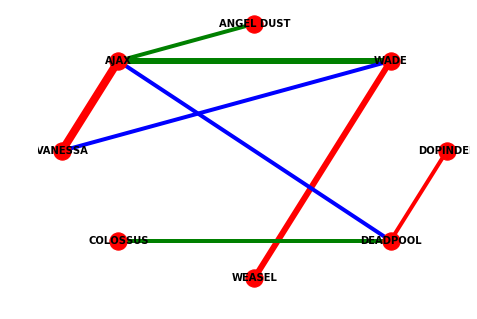

In [21]:
draw_network("deadpool4.txt")

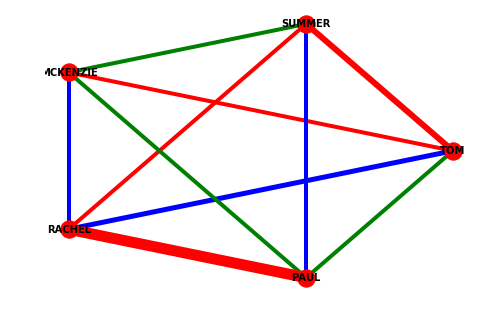

In [22]:
draw_network("500 DAYS OF SUMMER4.txt")

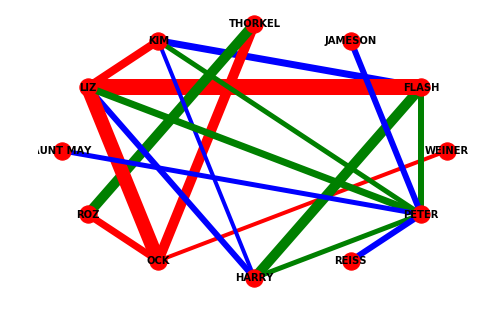

In [23]:
draw_network("Spider_man4.txt")

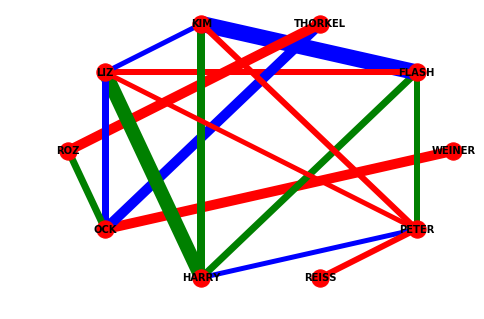

In [24]:
draw_network("Spider_man5.txt")

# node size 추가

In [176]:
def draw_network2(filename):
    f = open(filename, "r")
    lines =[]
    scene_delimiter = '#'
    weight_delimiter = '\t'
    size_delimimter = '\t'
    node_delimiter = '-'
    temp_line = ''
    flag = 1
    
    nodes = []
    edges = []
    weights = []
    nodeSizes = []
    
    temp_lines = f.readlines()

    for line in temp_lines:
        if line[-1] == '\n':
            lines.append(line[:-1])
        else:
            lines.append(line)


    f.close()


    # make Graph information
    for line in lines:
        if line == 'EDGE':
            flag = 0
            
        if '\t' in line:
            if flag == 0:
                temp = line.split(weight_delimiter)
                temp_nodes = temp[0]
                temp_weight = temp[1]

                # split node
                temp_nodes = temp[0].split(node_delimiter)
                temp_node1 = temp_nodes[0]
                temp_node2 = temp_nodes[1]

                # add edge
                temp_edge = (temp_node1, temp_node2)
                edges.append(temp_edge)

                # add weight
                weights.append(temp_weight)
            else:
                # add node with size
                node_info = line.split(size_delimimter)
                nodes.append(node_info[0])
                size = float(node_info[1])
                nodeSizes.append(size)
                
    G = nx.Graph()

    color_list = ['r', 'g', 'b']
    
    for i in range(len(edges)):
        G.add_edge(edges[i][0], edges[i][1], weight=weights[i], color=color_list[i%3])
    
    for i in range(len(nodes)):
        G.add_node(nodes[i], node_size=nodeSizes[i]*50)
        
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    nodeSizes = [G.nodes[u]['node_size'] for u in nodes]
    
    nx.draw_shell(G, with_labels=True, node_size=nodeSizes, font_weight='bold', font_size=10, edge_color=colors, width=weights, font_family='sans-serif')

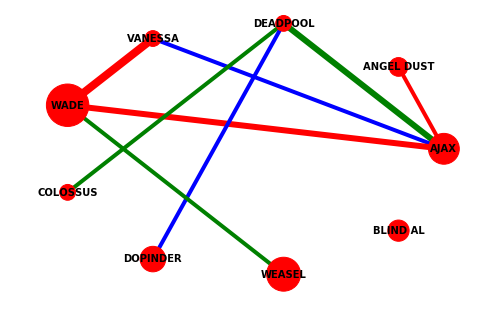

In [177]:
draw_network2("./output/Deadpool.txt")